In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import regularizers

In [2]:
path = '../input/ionosphere-data/'
file = path + 'ionosphere_data.csv'

In [6]:
df_ion = pd.read_csv(file)
df_ion.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [7]:
df_ion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [8]:
normalized_data=df_ion.copy()
normalized_data.shape

(351, 35)

In [9]:
normalized_data[normalized_data.duplicated()]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
248,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,b


In [10]:
normalized_data.drop_duplicates(inplace = True)
normalized_data.shape

(350, 35)

In [11]:
normalized_data["feature2"].value_counts()

0    350
Name: feature2, dtype: int64

In [12]:
normalized_data.drop(columns=["feature2"], inplace = True)
normalized_data.shape

(350, 34)

In [13]:
data = normalized_data
data.shape

(350, 34)

In [14]:
class_g = data[data["label"]=="g"]
class_b = data[data["label"]=="b"]

In [15]:
class_g.shape

(225, 34)

In [16]:
class_b.shape

(125, 34)

In [17]:
class_b_over= class_b.sample(len(class_g), replace = True,)
data_over = pd.concat([class_b_over, class_g], axis=0)

In [18]:
data_over["label"].value_counts()

b    225
g    225
Name: label, dtype: int64

In [19]:
len(data_over)

450

In [20]:
x_data = data_over.drop(columns=["label"])
label = data_over["label"]

In [21]:
train_data, test_data, train_labels, test_labels = train_test_split(x_data, label, test_size=.4, random_state=1, stratify=label)

In [22]:
train_data.shape, test_data.shape

((270, 33), (180, 33))

In [23]:
train_labels.shape, test_labels.shape

((270,), (180,))

In [24]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data=(test_data-mean)/std

In [25]:
train_labels = np.where(train_labels =="g", 1, 0 )
test_labels = np.where(test_labels =="g",1,0)

In [26]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=.001, l2=0.001) , activation="relu", input_shape=(train_data.shape[1],)))
  model.add(layers.Dropout(.1))
  model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=.001, l2=0.001), activation = "relu" ))
  model.add(layers.Dropout(.1))
  model.add(layers.Dense(1, activation="sigmoid"))

  model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics=["accuracy"])
  return model

In [27]:
k= 5
num_val_sample = len(train_data) // k
num_epochs =50
all_scores = []
all_val_loss_histories = []
all_val_acc_histories = []
all_loss_histories =[]
all_acc_histories = []

for i in range(k):
  print("processing fold #",i)
  val_data = train_data[i*num_val_sample:(i+1)*num_val_sample]
  val_labels = train_labels[i*num_val_sample: (i+1)*num_val_sample]

  partial_train_data=np.concatenate([train_data[:i*num_val_sample], train_data[(i+1)*num_val_sample:]], axis=0)
  partial_train_labels=np.concatenate([train_labels[:i*num_val_sample], train_labels[(i+1)*num_val_sample:]], axis=0)

  model=build_model()
  history = model.fit(partial_train_data, partial_train_labels, validation_data = (val_data, val_labels), epochs= num_epochs, batch_size=1, verbose=0)
  val_loss, val_acc = model.evaluate(test_data, test_labels, verbose=0)
  val_loss_history = history.history["val_loss"]
  val_acc_history = history.history["val_accuracy"]
  loss_history = history.history["loss"]
  acc_history = history.history["accuracy"]
  all_loss_histories.append(loss_history)
  all_acc_histories.append(acc_history)
  all_val_loss_histories.append(val_loss_history)
  all_val_acc_histories.append(val_acc_history)
  all_scores.append(val_loss)
ave_val_loss_hist = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
ave_loss_hist = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
ave_val_acc_hist = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
ave_acc_hist = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
all_scores

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


[0.28488385677337646,
 0.28526613116264343,
 0.4187268614768982,
 0.3376208245754242,
 0.3213990032672882]

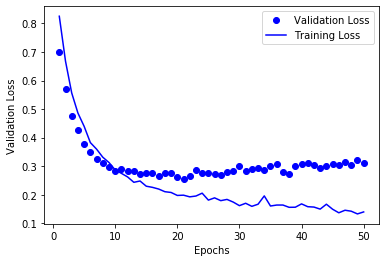

In [28]:
plt.plot(range(1, len(ave_val_loss_hist)+1)[:], ave_val_loss_hist[:], "bo", label="Validation Loss")
plt.plot(range(1, len(ave_val_loss_hist)+1)[:], ave_loss_hist[:], "b", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

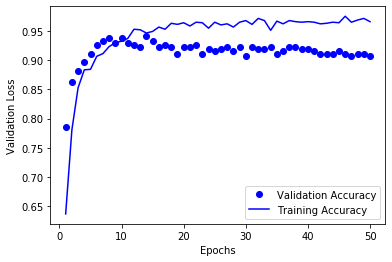

In [29]:
plt.plot(range(1, len(ave_val_acc_hist)+1)[:], ave_val_acc_hist[:], "bo", label="Validation Accuracy")
plt.plot(range(1, len(ave_val_acc_hist)+1)[:], ave_acc_hist[:], "b", label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [30]:
model=models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=.001, l2=0.001) , activation="relu", input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(.1))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=.001, l2=0.001), activation = "relu" ))
model.add(layers.Dropout(.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics=["accuracy"])

In [31]:
model.fit(train_data, train_labels, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 1ms/step - loss: 0.9037 - accuracy: 0.5435
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8586 - accuracy: 0.5851
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8173 - accuracy: 0.6375
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7794 - accuracy: 0.6969
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7308 - accuracy: 0.7638
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7388 - accuracy: 0.7687
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.7726
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.8115
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.8309
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.8609
Epoch 11/100
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9868
Epoch 85/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9846
Epoch 86/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9769
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1772 - accuracy: 0.9830
Epoch 88/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9834
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9893
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1765 - accuracy: 0.9905
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1716 - accuracy: 0.9909
Epoch 92/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9961
Epoch 93/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1808 - accuracy: 0.9790
Epoch 94/100
9/9 [===============

In [32]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

6/6 [==============================] - 0s 1ms/step - loss: 0.2259 - accuracy: 0.9722


In [33]:
test_acc_score *100

97.22222089767456

In [34]:
prediction=model.predict(test_data)
pred_norm =np.where(prediction>.5, 1, 0)
pred_norm=np.where(pred_norm==1, "g", "b")

In [35]:
pred_norm = pred_norm.reshape(pred_norm.shape[0],)
pred_norm[:10].T

array(['g', 'b', 'g', 'b', 'g', 'g', 'b', 'g', 'b', 'b'], dtype='<U1')

In [36]:
prediction[:10].T

array([[8.7875319e-01, 1.6298890e-04, 9.9542260e-01, 1.9522652e-09,
        9.8452568e-01, 9.9888909e-01, 5.9284680e-08, 9.9786079e-01,
        1.9808695e-05, 1.8958747e-02]], dtype=float32)

In [37]:
test_labels_new = np.where(test_labels==1, "g", "b")

In [38]:
test_labels_new[:10]

array(['g', 'b', 'g', 'b', 'g', 'g', 'b', 'g', 'b', 'b'], dtype='<U1')

In [39]:
c= pred_norm.size
c

180

In [40]:
comapre_pred_test = test_labels_new == pred_norm

In [41]:
b = comapre_pred_test[comapre_pred_test[:]==True].size
b

175

In [42]:
a = comapre_pred_test[comapre_pred_test[:]==False].size
a

5

In [43]:
print("Incorrect Predictions are:", a, "and Correct predictions are :", b, " the percentage is:", round((b/c)*100,2), "%"  )

Incorrect Predictions are: 5 and Correct predictions are : 175  the percentage is: 97.22 %
